In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuración
np.random.seed(42)
plt.style.use('default')
sns.set_palette("husl")

print("=" * 80)
print("ASSIGNMENT UT3-10: PCA y Feature Selection - Ames Housing Dataset")
print("=" * 80)

# ========== FUNCIÓN DE CARGA Y PREPROCESAMIENTO RÁPIDO ==========
def quick_load_and_preprocess_ames(filepath='AmesHousing.csv'):
    """
    Carga y preprocesa Ames Housing en un solo paso
    (Ya hiciste esto en tareas anteriores, aquí es versión simplificada)
    """
    print("\n🏠 CARGANDO Y PREPROCESANDO AMES HOUSING...")

    # Cargar dataset
    df = pd.read_csv(filepath)
    print(f"✅ Dataset cargado: {df.shape[0]:,} casas, {df.shape[1]} columnas")

    # Eliminar 'Id' (no predictivo)
    df = df.drop('Id', axis=1, errors='ignore')

    # Identificar tipos de variables
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Remover target de features
    if 'SalePrice' in numerical_cols:
        numerical_cols.remove('SalePrice')

    print(f"✅ Features numéricas: {len(numerical_cols)}")
    print(f"✅ Features categóricas: {len(categorical_cols)}")

    # Imputar valores faltantes
    num_imputer = SimpleImputer(strategy='median')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    print(f"✅ Missing values imputados")

    # Label encoding para categóricas
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    print(f"✅ Categóricas encoded")

    # Separar X y y
    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']

    print(f"\n✅ DATASET LISTO:")
    print(f"   X shape: {X.shape} ({X.shape[1]} features)")
    print(f"   y shape: {y.shape}")
    print(f"   Precio promedio: ${y.mean():,.0f}")
    print(f"   Precio mediana: ${y.median():,.0f}")

    return X, y, X.columns.tolist()

# ========== EJECUTAR CARGA RÁPIDA ==========
# TODO: Completa con el path correcto
X, y, feature_names = quick_load_and_preprocess_ames("data/AmesHousing.csv")

print(f"\n📊 RESUMEN DEL DATASET:")
print(f"   Total features: {X.shape[1]}")
print(f"   Total casas: {X.shape[0]:,}")
print(f"   Ejemplos de features: {feature_names[:10]}")

ASSIGNMENT UT3-10: PCA y Feature Selection - Ames Housing Dataset

🏠 CARGANDO Y PREPROCESANDO AMES HOUSING...
✅ Dataset cargado: 2,930 casas, 82 columnas
✅ Features numéricas: 38
✅ Features categóricas: 43
✅ Missing values imputados
✅ Categóricas encoded

✅ DATASET LISTO:
   X shape: (2930, 81) (81 features)
   y shape: (2930,)
   Precio promedio: $180,796
   Precio mediana: $160,000

📊 RESUMEN DEL DATASET:
   Total features: 81
   Total casas: 2,930
   Ejemplos de features: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour']


In [3]:
from sklearn.preprocessing import StandardScaler

# ========== ESTANDARIZACIÓN ==========
print("=== ESTANDARIZACIÓN DE FEATURES ===")
print("⚠️ PCA es sensible a escala. SIEMPRE estandarizar antes de PCA.")

# TODO: Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar estandarización: mean ≈ 0, std ≈ 1
print(f"\n✅ Mean después de scaling: {X_scaled.mean():.6f} (esperado: ~0)")
print(f"✅ Std después de scaling: {X_scaled.std():.6f} (esperado: ~1)")

# Verificar shape
print(f"✅ X_scaled shape: {X_scaled.shape}")

# Comparar antes vs después
print(f"\n=== COMPARACIÓN ANTES vs DESPUÉS ===")
print(f"Antes - Mean GrLivArea: {X['Gr Liv Area'].mean():.0f}, Std: {X['Gr Liv Area'].std():.0f}")
print(f"Después - Mean GrLivArea: {X_scaled[:, X.columns.get_loc('Gr Liv Area')].mean():.6f}, Std: {X_scaled[:, X.columns.get_loc('Gr Liv Area')].std():.6f}")

=== ESTANDARIZACIÓN DE FEATURES ===
⚠️ PCA es sensible a escala. SIEMPRE estandarizar antes de PCA.

✅ Mean después de scaling: -0.000000 (esperado: ~0)
✅ Std después de scaling: 1.000000 (esperado: ~1)
✅ X_scaled shape: (2930, 81)

=== COMPARACIÓN ANTES vs DESPUÉS ===
Antes - Mean GrLivArea: 1500, Std: 506
Después - Mean GrLivArea: 0.000000, Std: 1.000000


In [4]:
from sklearn.decomposition import PCA
import time

# ========== APLICAR PCA SIN RESTRICCIONES ==========
print("\n=== APLICANDO PCA ===")
print("⏱️ Esto puede tomar 10-20 segundos con 80 features...")

start_time = time.time()

# TODO: Aplicar PCA sin restricción de componentes
pca = PCA()  # Sin n_components = todos los componentes posibles
X_pca = pca.fit_transform(X_scaled)

elapsed_time = time.time() - start_time
print(f"✅ PCA completado en {elapsed_time:.2f} segundos")

# ========== ANALIZAR VARIANZA EXPLICADA ==========
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\n=== ANÁLISIS DE COMPONENTES PRINCIPALES ===")
print(f"Total de componentes generados: {pca.n_components_}")
print(f"\nVarianza explicada por componentes principales:")
print(f"  PC1: {explained_variance[0]:.3%} (¡la más importante!)")
print(f"  PC2: {explained_variance[1]:.3%}")
print(f"  PC3: {explained_variance[2]:.3%}")
print(f"  PC4: {explained_variance[3]:.3%}")
print(f"  PC5: {explained_variance[4]:.3%}")

# TODO: Top 10 componentes
print("\n=== TOP 10 COMPONENTES ===")
for i in range(min(10, len(explained_variance))):
    print(f"PC{i+1:2d}: Individual {explained_variance[i]:6.3%} | Acumulada {cumulative_variance[i]:6.3%}")


=== APLICANDO PCA ===
⏱️ Esto puede tomar 10-20 segundos con 80 features...
✅ PCA completado en 0.07 segundos

=== ANÁLISIS DE COMPONENTES PRINCIPALES ===
Total de componentes generados: 81

Varianza explicada por componentes principales:
  PC1: 13.409% (¡la más importante!)
  PC2: 4.956%
  PC3: 4.709%
  PC4: 3.690%
  PC5: 2.974%

=== TOP 10 COMPONENTES ===
PC 1: Individual 13.409% | Acumulada 13.409%
PC 2: Individual 4.956% | Acumulada 18.365%
PC 3: Individual 4.709% | Acumulada 23.074%
PC 4: Individual 3.690% | Acumulada 26.765%
PC 5: Individual 2.974% | Acumulada 29.739%
PC 6: Individual 2.727% | Acumulada 32.466%
PC 7: Individual 2.550% | Acumulada 35.017%
PC 8: Individual 2.404% | Acumulada 37.420%
PC 9: Individual 2.239% | Acumulada 39.659%
PC10: Individual 2.121% | Acumulada 41.780%



=== SCREE PLOT: VISUALIZACIÓN DE VARIANZA ===


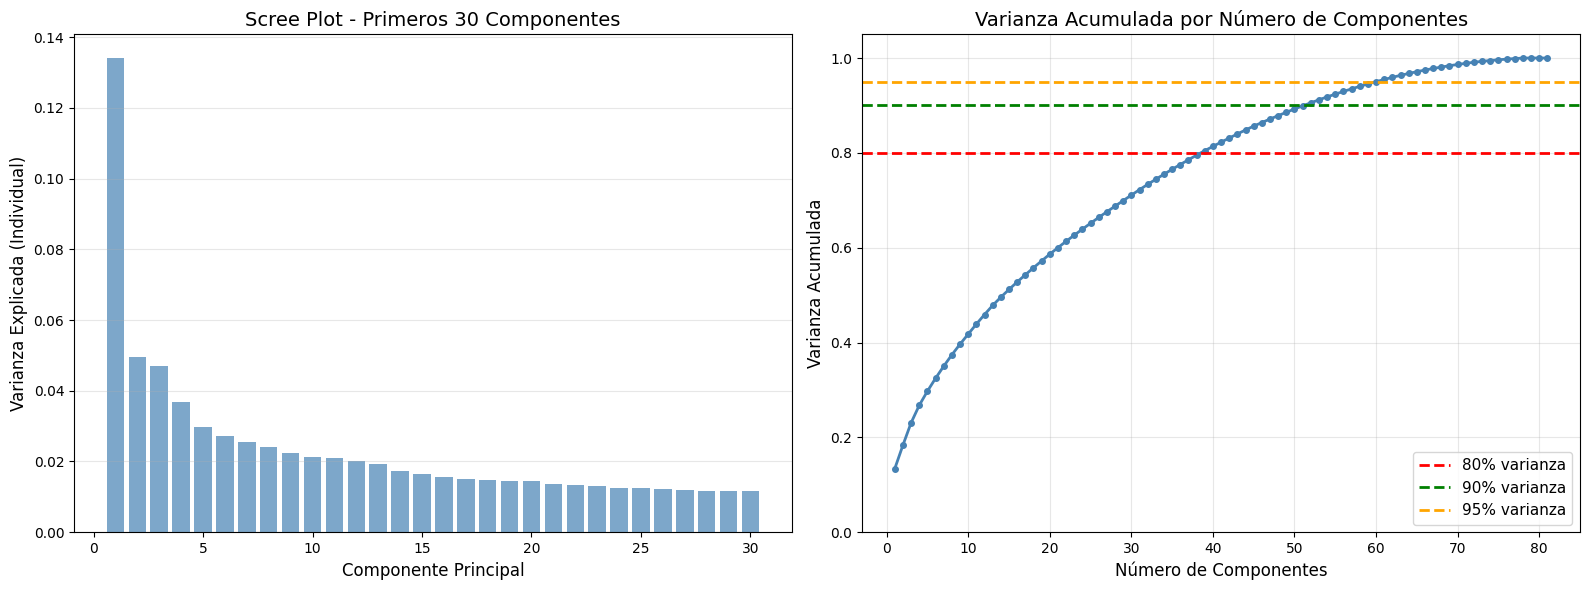


=== DECISIÓN: ¿CUÁNTOS COMPONENTES NECESITAMOS? ===
📊 Para 80% de varianza: 38 componentes
📊 Para 90% de varianza: 51 componentes
📊 Para 95% de varianza: 59 componentes

🎯 IMPACTO DE REDUCCIÓN DIMENSIONAL:
   Original: 81 features
   80% varianza: 81 → 38 (53.1% reducción)
   90% varianza: 81 → 51 (37.0% reducción)
   95% varianza: 81 → 59 (27.2% reducción)

💡 RECOMENDACIÓN PRÁCTICA:
   Para este assignment, usaremos 38 componentes (80% varianza)
   Esto balancea reducción dimensional con retención de información


In [5]:
# ========== CREAR SCREE PLOT ==========
print("\n=== SCREE PLOT: VISUALIZACIÓN DE VARIANZA ===")

# TODO: Crear scree plot con 80 componentes
plt.figure(figsize=(16, 6))

# Subplot 1: Varianza individual (primeros 30 componentes para claridad)
plt.subplot(1, 2, 1)
n_to_show = min(30, len(explained_variance))
plt.bar(range(1, n_to_show + 1), explained_variance[:n_to_show], alpha=0.7, color='steelblue')
plt.xlabel('Componente Principal', fontsize=12)
plt.ylabel('Varianza Explicada (Individual)', fontsize=12)
plt.title(f'Scree Plot - Primeros {n_to_show} Componentes', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Varianza acumulada (TODOS los componentes)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', 
         color='steelblue', markersize=4, linewidth=2)

# Líneas de referencia
plt.axhline(y=0.80, color='r', linestyle='--', label='80% varianza', linewidth=2)
plt.axhline(y=0.90, color='g', linestyle='--', label='90% varianza', linewidth=2)
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% varianza', linewidth=2)

plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Varianza Acumulada', fontsize=12)
plt.title('Varianza Acumulada por Número de Componentes', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.ylim([0, 1.05])

plt.tight_layout()
plt.show()

# ========== DECISIÓN DE DIMENSIONALIDAD ==========
print("\n=== DECISIÓN: ¿CUÁNTOS COMPONENTES NECESITAMOS? ===")
# TODO: Calcular componentes necesarios para diferentes umbrales
n_components_80 = np.argmax(cumulative_variance >= 0.80) 
n_components_90 = np.argmax(cumulative_variance >= 0.90)
n_components_95 = np.argmax(cumulative_variance >= 0.95) 

print(f"📊 Para 80% de varianza: {n_components_80} componentes")
print(f"📊 Para 90% de varianza: {n_components_90} componentes")
print(f"📊 Para 95% de varianza: {n_components_95} componentes")

# Análisis de reducción dimensional
original_features = X.shape[1]
reduction_80 = (1 - n_components_80 / original_features) * 100
reduction_90 = (1 - n_components_90 / original_features) * 100
reduction_95 = (1 - n_components_95 / original_features) * 100

print(f"\n🎯 IMPACTO DE REDUCCIÓN DIMENSIONAL:")
print(f"   Original: {original_features} features")
print(f"   80% varianza: {original_features} → {n_components_80} ({reduction_80:.1f}% reducción)")
print(f"   90% varianza: {original_features} → {n_components_90} ({reduction_90:.1f}% reducción)")
print(f"   95% varianza: {original_features} → {n_components_95} ({reduction_95:.1f}% reducción)")

print(f"\n💡 RECOMENDACIÓN PRÁCTICA:")
print(f"   Para este assignment, usaremos {n_components_80} componentes (80% varianza)")
print(f"   Esto balancea reducción dimensional con retención de información")


=== FEATURE SELECTION BASADA EN PCA LOADINGS ===
💡 En lugar de usar PC1, PC2... usaremos las features ORIGINALES
   que tienen mayor loading (peso) en los componentes principales

🔍 Analizando loadings de los primeros 38 componentes...

📊 ESTRATEGIA: Ranking de features por suma de loadings absolutos

🔝 TOP 20 FEATURES POR IMPORTANCIA EN PCA:
   1. Roof Matl                : 4.6417
   2. Functional               : 4.4412
   3. Mo Sold                  : 4.2498
   4. Screen Porch             : 4.2497
   5. Bsmt Half Bath           : 4.2100
   6. Heating                  : 4.2073
   7. Condition 2              : 4.1315
   8. Low Qual Fin SF          : 4.1240
   9. Fence                    : 4.0949
  10. Lot Config               : 3.9588
  11. Enclosed Porch           : 3.9240
  12. Sale Condition           : 3.9128
  13. Land Contour             : 3.9000
  14. Roof Style               : 3.8588
  15. 3Ssn Porch               : 3.8264
  16. Condition 1              : 3.8184
  17. Sale Typ

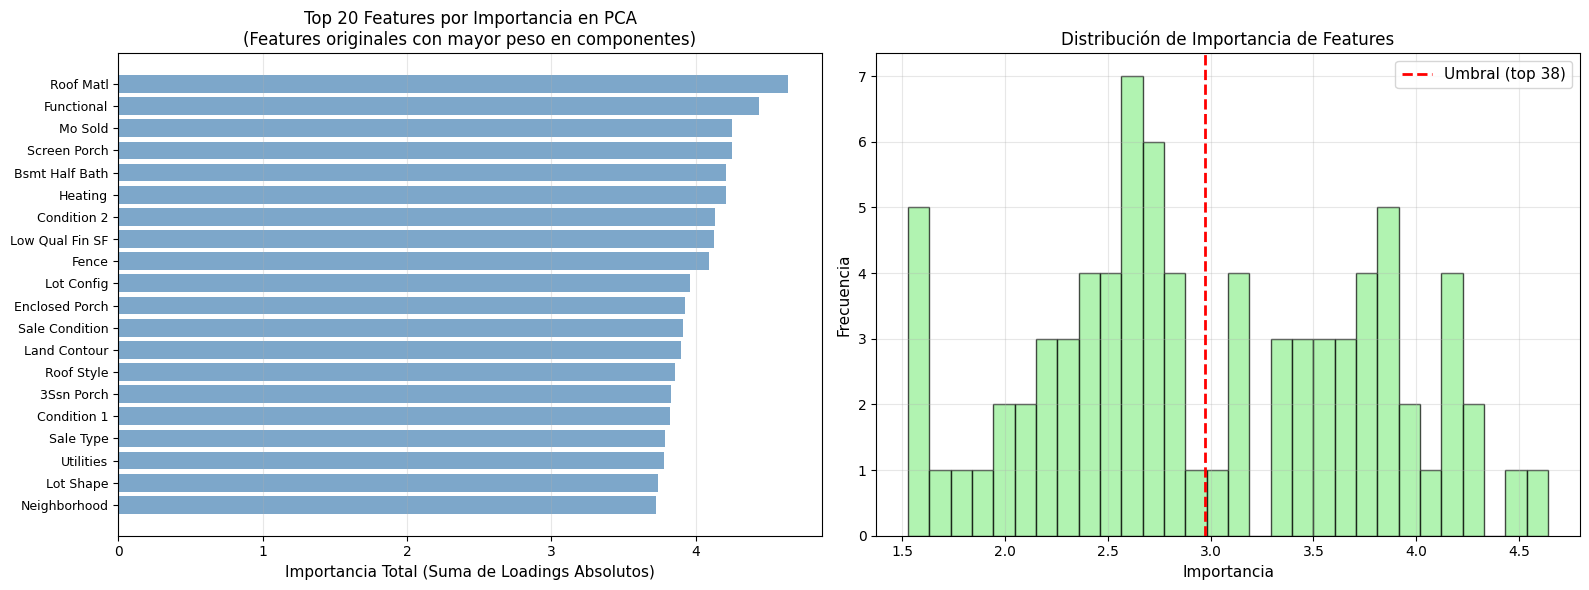


💡 INTERPRETACIÓN:
   Estas features originales son las que 'explican' los componentes principales
   Ventaja: Mantienen interpretabilidad (puedes decir 'GrLivArea importa')
   Diferencia con PCA: Usas features originales, no combinaciones lineales


In [7]:
# ========== FEATURE SELECTION BASADA EN PCA LOADINGS ==========
print("\n=== FEATURE SELECTION BASADA EN PCA LOADINGS ===")
print("💡 En lugar de usar PC1, PC2... usaremos las features ORIGINALES")
print("   que tienen mayor loading (peso) en los componentes principales")

# Decidir cuántos componentes considerar
n_top_components = min(n_components_80, pca.n_components_)

# Obtener loadings absolutos de todos los componentes importantes
print(f"\n🔍 Analizando loadings de los primeros {n_top_components} componentes...")

# Para cada componente, obtener las features con mayor loading absoluto
all_loadings = pca.components_[:n_top_components, :]  # Primeros n componentes

# Crear DataFrame con loadings de todos los componentes
loadings_all = pd.DataFrame(
    all_loadings.T,
    columns=[f'PC{i+1}' for i in range(n_top_components)],
    index=X.columns
)

# ========== ESTRATEGIA: SUMAR LOADINGS ABSOLUTOS ==========
# Para cada feature, sumar su importancia (loading absoluto) en todos los componentes
print("\n📊 ESTRATEGIA: Ranking de features por suma de loadings absolutos")

# TODO: Calcular importancia total de cada feature
feature_importance_from_pca = loadings_all.abs().sum(axis=1)

# Ordenar por importancia
feature_importance_from_pca = feature_importance_from_pca.sort_values(ascending=False)

print(f"\n🔝 TOP 20 FEATURES POR IMPORTANCIA EN PCA:")
for i, (feature, importance) in enumerate(feature_importance_from_pca.head(20).items(), 1):
    print(f"  {i:2d}. {feature:25s}: {importance:.4f}")

# ========== SELECCIONAR TOP-K FEATURES ==========
k = n_components_80  # Mismo número que usamos con PCA reducido

print(f"\n✅ Seleccionando top {k} features originales basadas en loadings de PCA")

# TODO: Seleccionar features
selected_features_pca = feature_importance_from_pca.head(k).index.tolist()

print(f"\n📋 Features seleccionadas ({k}):")
for i, feat in enumerate(selected_features_pca, 1):
    print(f"  {i:2d}. {feat}")

# ========== PREPARAR DATASET CON FEATURES SELECCIONADAS ==========
X_pca_selected = X_scaled[:, X.columns.isin(selected_features_pca)]

print(f"\n✅ Dataset con features seleccionadas por PCA:")
print(f"   Shape: {X_pca_selected.shape}")
print(f"   Reducción: {X.shape[1]} → {X_pca_selected.shape[1]} features")

# ========== VISUALIZAR COMPARACIÓN ==========
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 features por importancia PCA
ax1.barh(range(20), feature_importance_from_pca.head(20).values, color='steelblue', alpha=0.7)
ax1.set_yticks(range(20))
ax1.set_yticklabels(feature_importance_from_pca.head(20).index, fontsize=9)
ax1.set_xlabel('Importancia Total (Suma de Loadings Absolutos)', fontsize=11)
ax1.set_title('Top 20 Features por Importancia en PCA\n(Features originales con mayor peso en componentes)', fontsize=12)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Distribución de importancias
ax2.hist(feature_importance_from_pca, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.set_xlabel('Importancia', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.set_title('Distribución de Importancia de Features', fontsize=12)
ax2.axvline(feature_importance_from_pca.iloc[k-1], color='red', linestyle='--', 
            label=f'Umbral (top {k})', linewidth=2)
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print("   Estas features originales son las que 'explican' los componentes principales")
print("   Ventaja: Mantienen interpretabilidad (puedes decir 'GrLivArea importa')")
print("   Diferencia con PCA: Usas features originales, no combinaciones lineales")